In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 160
plt.rcParams['lines.linewidth'] = 0.75
plt.rcParams['text.usetex'] = True
colors = sns.color_palette("viridis", 10)

In [15]:
# Setup parameters
data_dir = "../../data/"
save_path_train = f"{data_dir}preprocessed/gdansk_complete_deep_regression_seconds_original_train.csv"

In [16]:
%%time
train = pd.read_csv(save_path_train, nrows=10)
train

CPU times: user 1.68 s, sys: 23.7 ms, total: 1.7 s
Wall time: 1.68 s


,Unnamed: 0,age,rr1,rr2,rr3,rr4,rr5,rr6,rr7,rr8,...,rr26991,rr26992,rr26993,rr26994,rr26995,rr26996,rr26997,rr26998,rr26999,rr27000
0,0,55,1.016,1.000,1.016,1.032,1.008,1.024,1.024,1.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,55,1.024,0.992,0.976,0.952,0.936,0.992,0.992,0.952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,25,0.864,0.840,0.896,0.944,0.896,0.824,0.824,0.888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,45,0.840,0.832,0.832,0.848,0.824,0.832,0.808,0.824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,75,0.888,0.888,0.888,0.896,0.920,0.904,0.888,0.888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,55,0.960,0.896,0.928,1.048,1.088,1.064,1.040,1.024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,65,0.880,0.880,0.872,0.920,0.936,0.920,0.896,0.912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,55,0.992,0.984,0.952,0.984,0.952,0.952,0.944,0.952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,25,0.720,0.712,0.744,0.752,0.784,0.832,0.872,0.904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,25,0.912,0.944,0.928,0.896,0.952,0.944,0.936,0.920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
N = 250
from_gap = 65
to_gap = 80
sseries = train.iloc[0][2:].dropna(inplace=False)[0:N]
part_a = sseries[0:from_gap]
part_b = sseries[to_gap:(N-50)]
indices_a = list(range(0, from_gap))
indices_b = list(range(to_gap, (N-50)))
missing_a = sseries[(from_gap-1):(to_gap+1)]
missing_indices_a = list(range((from_gap-1), (to_gap+1)))
missing_b = sseries[(N-50):N]
missing_indices_b = list(range((N-50), N))

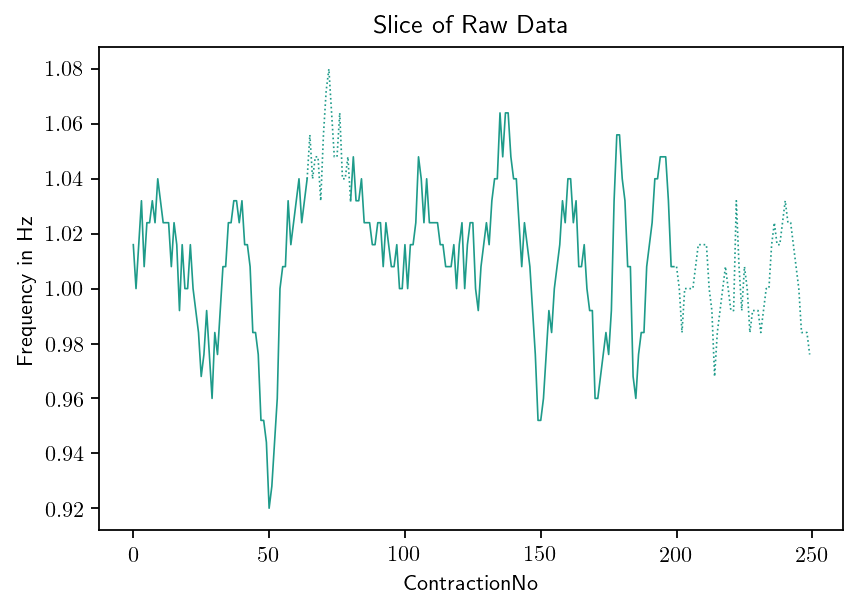

In [25]:
plt.plot(indices_a, part_a, color=colors[5]);
plt.plot(indices_b, part_b, color=colors[5]);
plt.plot(missing_indices_a, missing_a, color=colors[5], linestyle=":");
plt.plot(missing_indices_b, missing_b, color=colors[5], linestyle=":");
plt.title('Slice of Raw Data');
plt.ylabel('Frequency in Hz');
plt.xlabel('ContractionNo');

In [19]:
complete_missing = train.iloc[0][2:].dropna(inplace=False)[0:N]
complete_missing[(from_gap-1):(to_gap+1)] = np.NaN
complete_missing[(N-50):N] = np.NaN
complete_missing

rr1      1.016
rr2      1.000
rr3      1.016
rr4      1.032
rr5      1.008
         ...  
rr246      NaN
rr247      NaN
rr248      NaN
rr249      NaN
rr250      NaN
Name: 0, Length: 250, dtype: float64

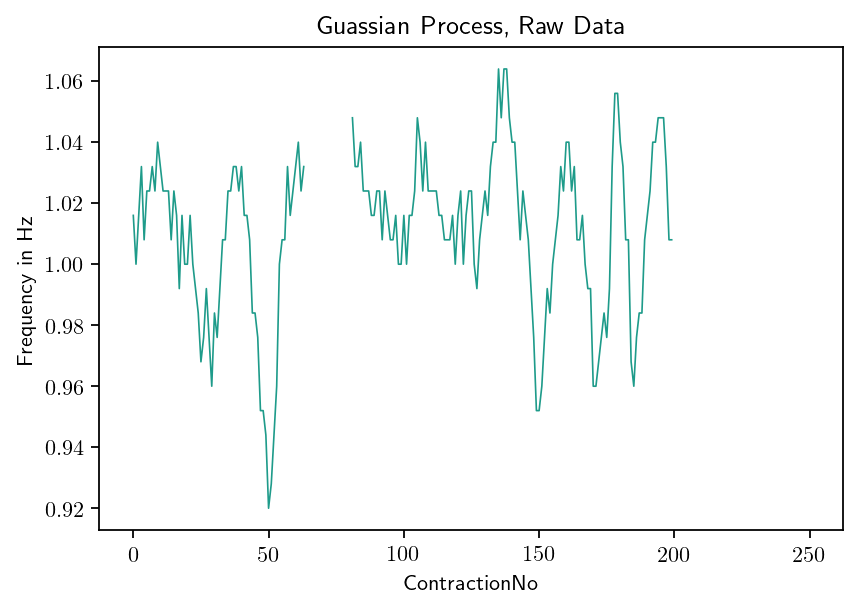

In [20]:
plt.plot(range(len(complete_missing)), complete_missing, color=colors[5]);
plt.plot(250, 1, color="white")
plt.title('Guassian Process, Raw Data');
plt.ylabel('Frequency in Hz');
plt.xlabel('ContractionNo');

In [22]:
complete_missing_interpolated = complete_missing.interpolate(method="linear")

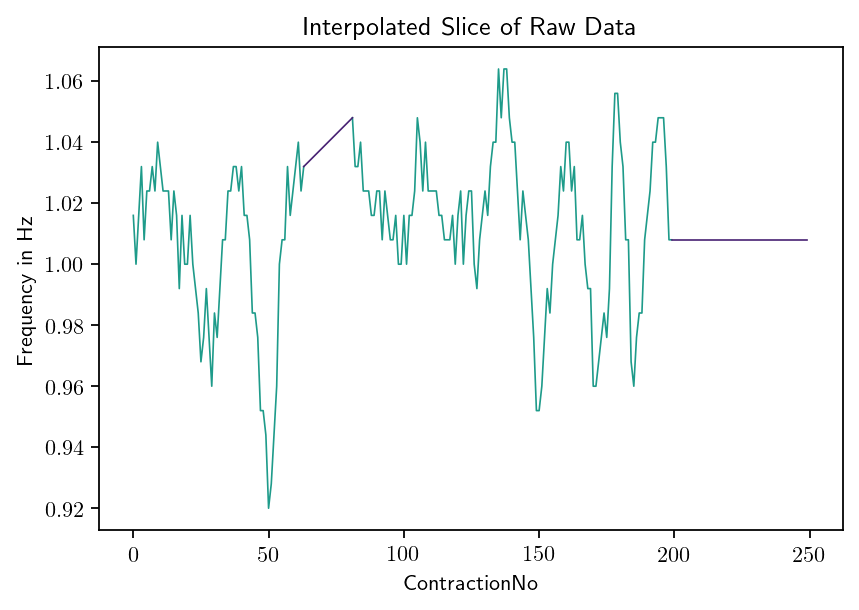

In [26]:
plt.plot(range(len(complete_missing)), complete_missing, color=colors[5]);
plt.plot(range(from_gap-2, to_gap+2), complete_missing_interpolated[(from_gap-2):(to_gap+2)], color=colors[0]);
plt.plot(range(N-51, N), complete_missing_interpolated[(N-51):N], color=colors[0]);
plt.plot(250, 1, color="white")
plt.title('Interpolated Slice of Raw Data');
plt.ylabel('Frequency in Hz');
plt.xlabel('ContractionNo');

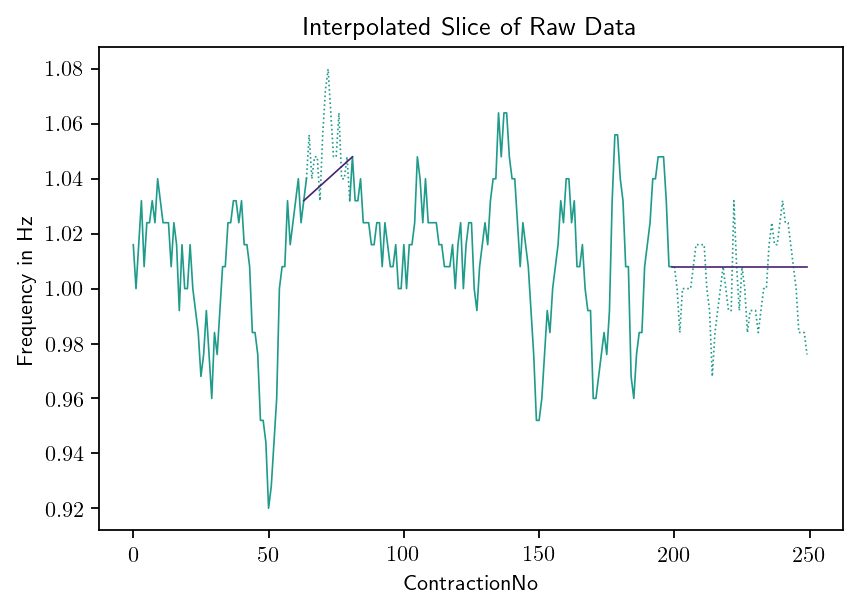

In [27]:
plt.plot(indices_a, part_a, color=colors[5]);
plt.plot(indices_b, part_b, color=colors[5]);
plt.plot(missing_indices_a, missing_a, color=colors[5], linestyle=":");
plt.plot(missing_indices_b, missing_b, color=colors[5], linestyle=":");
plt.plot(range(from_gap-2, to_gap+2), complete_missing_interpolated[(from_gap-2):(to_gap+2)], color=colors[0]);
plt.plot(range(N-51, N), complete_missing_interpolated[(N-51):N], color=colors[0]);
plt.plot(250, 1, color="white")
plt.title('Interpolated Slice of Raw Data');
plt.ylabel('Frequency in Hz');
plt.xlabel('ContractionNo');